In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import datetime
from datetime import time
import time
import matplotlib
from datetime import datetime

In [39]:
EBS = pd.read_excel("DF_RF.xlsx", usecols=lambda x: x != 'Unnamed: 0')
display(EBS.head)

<bound method NDFrame.head of         sexo         tramoebs1                         neduc_ebs  \
0      Mujer   2. 30 a 44 años          3. Ed. superior completa   
1      Mujer   1. 18 a 29 años          3. Ed. superior completa   
2     Hombre   1. 18 a 29 años          3. Ed. superior completa   
3     Hombre   3. 45 a 59 años          3. Ed. superior completa   
4     Hombre   2. 30 a 44 años             2. Ed. media completa   
...      ...               ...                               ...   
998    Mujer  4. 60 años o más  1. Inferior a Ed. media completa   
999    Mujer   2. 30 a 44 años             2. Ed. media completa   
1000   Mujer   3. 45 a 59 años  1. Inferior a Ed. media completa   
1001   Mujer   1. 18 a 29 años             2. Ed. media completa   
1002   Mujer   1. 18 a 29 años             2. Ed. media completa   

                              a1         a2_1         a2_2      a2_3  \
0                 3. Indiferente      3. Algo      3. Algo   1. Nada   
1       5

In [40]:
EBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sexo       1003 non-null   object
 1   tramoebs1  1003 non-null   object
 2   neduc_ebs  1003 non-null   object
 3   a1         1003 non-null   object
 4   a2_1       1003 non-null   object
 5   a2_2       1003 non-null   object
 6   a2_3       1003 non-null   object
 7   a2_4       1003 non-null   object
 8   a3_1       1003 non-null   object
 9   a3_2a      627 non-null    object
 10  a3_2b      60 non-null     object
 11  a3_3       1003 non-null   object
 12  a3_4       627 non-null    object
 13  a3_5       1003 non-null   object
 14  a3_6       1003 non-null   object
 15  a3_7       1003 non-null   object
 16  a3_8       1003 non-null   object
 17  a3_9       1003 non-null   object
 18  i1         1003 non-null   object
 19  i2_1       1003 non-null   object
 20  i2_2       1003 non-null   obj

In [42]:
EBS['cumple']=EBS['cumple'].astype('object')
EBS['cumple'].value_counts()

0    869
1    134
Name: cumple, dtype: int64

In [5]:
# Suponiendo que 'EBS' es tu DataFrame
variables_EBS = EBS.columns.tolist()

# Imprimir la lista de variables
print(variables_EBS)

['sexo', 'tramoebs1', 'neduc_ebs', 'a1', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_2a', 'a3_2b', 'a3_3', 'a3_4', 'a3_5', 'a3_6', 'a3_7', 'a3_8', 'a3_9', 'i1', 'i2_1', 'i2_2', 'i2_3', 'i2_4', 'i2_5', 'e4', 'f1_1', 'f1_2', 'f1_3', 'f1_4', 'f1_5', 'b9_1', 'b9_2', 'b9_3', 'b9_4', 'imc_cat', 'g1', 'g2_1', 'g2_2', 'g2_3', 'g3_1', 'g3_2', 'g3_3', 'g3_4', 'g3_5', 'g3_6', 'g3_7', 'g4_1', 'g4_2', 'g4_3', 'g4_4', 'g4_5', 'h1', 'h2', 'h4_1', 'a_ing', 'a_VIDA', 'a_g', 'cumple']


In [44]:
# Suponiendo que 'EBS' es tu DataFrame
columnas_a_eliminar = ['sexo', 'tramoebs1', 'neduc_ebs', 'a3_2a', 'a3_3', 'a3_4','g1', 'a3_2b','i2_3', 'i2_4', 'a_ing', 'a_VIDA']

# Eliminar las columnas especificadas
EBS = EBS.drop(columnas_a_eliminar, axis=1)

KeyError: "['sexo', 'tramoebs1', 'neduc_ebs', 'a3_2a', 'a3_3', 'a3_4', 'g1', 'a3_2b', 'i2_3', 'i2_4', 'a_ing', 'a_VIDA'] not found in axis"

In [45]:
EBS.replace('9. No sabe/No responde', np.nan, inplace=True)


In [46]:
EBS_NONA= EBS.dropna()

In [47]:
EBS_NONA.columns.tolist()

['a1',
 'a2_1',
 'a2_2',
 'a2_3',
 'a2_4',
 'a3_1',
 'a3_5',
 'a3_6',
 'a3_7',
 'a3_8',
 'a3_9',
 'i1',
 'i2_1',
 'i2_2',
 'i2_5',
 'e4',
 'f1_1',
 'f1_2',
 'f1_3',
 'f1_4',
 'f1_5',
 'b9_1',
 'b9_2',
 'b9_3',
 'b9_4',
 'imc_cat',
 'g2_1',
 'g2_2',
 'g2_3',
 'g3_1',
 'g3_2',
 'g3_3',
 'g3_4',
 'g3_5',
 'g3_6',
 'g3_7',
 'g4_1',
 'g4_2',
 'g4_3',
 'g4_4',
 'g4_5',
 'h1',
 'h2',
 'h4_1',
 'a_g',
 'cumple']

In [48]:
EBS_NONA['a1'].unique()

array(['3. Indiferente', '5. Totalmente satisfecho', '4. Satisfecho',
       '2. Insatisfecho', '1. Totalmente insatisfecho'], dtype=object)

In [49]:
# Diccionario de mapeo
mapeo_numeros = {
    '1. Totalmente insatisfecho': 1,
    '2. Insatisfecho': 2,
    '3. Indiferente': 3,
    '4. Satisfecho': 4,
    '5. Totalmente satisfecho': 5
}

# Columnas a procesar
columnas_ordinales = ['a1', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_5', 'a3_6', 'a3_7', 'a3_8', 'a3_9']

# Almacena una copia temporal de las columnas originales
columnas_originales = EBS_NONA[columnas_ordinales].copy()

# Reemplaza las categorías por sus valores numéricos
for col in columnas_ordinales:
    EBS_NONA[col] = EBS_NONA[col].map(mapeo_numeros)

# Calcular el promedio de las columnas
EBS_NONA['promedio'] = EBS_NONA[columnas_ordinales].mean(axis=1)

# Devolver las columnas a su tipo original
EBS_NONA[columnas_ordinales] = columnas_originales


C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3624562421.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EBS_NONA[col] = EBS_NONA[col].map(mapeo_numeros)
C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3624562421.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EBS_NONA[col] = EBS_NONA[col].map(mapeo_numeros)
C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3624562421.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [12]:
EBS_NONA['promedio'].unique()

array([3.14285714, 3.28571429, 2.71428571, 3.71428571, 2.57142857,
       4.57142857, 3.        , 2.85714286, 3.57142857, 2.28571429,
       3.42857143, 2.42857143, 4.        , 2.14285714, 2.        ,
       1.71428571, 4.28571429, 3.85714286, 4.42857143, 4.14285714,
       1.85714286, 1.42857143, 4.71428571, 1.        , 5.        ,
       1.57142857, 4.85714286, 1.28571429])

In [50]:
# Crea la columna 'satisfaccion' basada en el valor del promedio
EBS_NONA['satisfaccion'] = EBS_NONA['promedio'].apply(lambda x: 0 if x < 4 else 1)


# Convierte la columna 'satisfaccion' al tipo de dato objeto (string)
EBS_NONA['satisfaccion'] = EBS_NONA['satisfaccion'].astype('object')


C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3197706327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EBS_NONA['satisfaccion'] = EBS_NONA['promedio'].apply(lambda x: 0 if x < 4 else 1)
C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3197706327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EBS_NONA['satisfaccion'] = EBS_NONA['satisfaccion'].astype('object')


In [51]:
EBS_NONA['satisfaccion'].unique()

array([0, 1], dtype=object)

In [52]:
EBS_NONA.columns

Index(['a1', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_5', 'a3_6', 'a3_7',
       'a3_8', 'a3_9', 'i1', 'i2_1', 'i2_2', 'i2_5', 'e4', 'f1_1', 'f1_2',
       'f1_3', 'f1_4', 'f1_5', 'b9_1', 'b9_2', 'b9_3', 'b9_4', 'imc_cat',
       'g2_1', 'g2_2', 'g2_3', 'g3_1', 'g3_2', 'g3_3', 'g3_4', 'g3_5', 'g3_6',
       'g3_7', 'g4_1', 'g4_2', 'g4_3', 'g4_4', 'g4_5', 'h1', 'h2', 'h4_1',
       'a_g', 'cumple', 'promedio', 'satisfaccion'],
      dtype='object')

In [56]:
# Suponiendo que 'EBS_NONA' es tu DataFrame
EBS_NONA['cumple'] = EBS_NONA['cumple'].replace({0: 'NO', 1: 'SI'}).astype('object')

In [55]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['a1', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_5', 'a3_6', 'a3_7', 'a3_8', 'a3_9', 'promedio']

# Eliminar las columnas del DataFrame original
EBS_NONA = EBS_NONA.drop(columnas_a_eliminar, axis=1)


KeyError: "['a1', 'a2_1', 'a2_2', 'a2_3', 'a2_4', 'a3_1', 'a3_5', 'a3_6', 'a3_7', 'a3_8', 'a3_9', 'promedio'] not found in axis"

In [18]:
EBS_NONA.columns

Index(['i1', 'i2_1', 'i2_2', 'i2_5', 'e4', 'f1_1', 'f1_2', 'f1_3', 'f1_4',
       'f1_5', 'b9_1', 'b9_2', 'b9_3', 'b9_4', 'imc_cat', 'g2_1', 'g2_2',
       'g2_3', 'g3_1', 'g3_2', 'g3_3', 'g3_4', 'g3_5', 'g3_6', 'g3_7', 'g4_1',
       'g4_2', 'g4_3', 'g4_4', 'g4_5', 'h1', 'h2', 'h4_1', 'a_g', 'cumple',
       'satisfaccion'],
      dtype='object')

In [57]:
EBS_NONA.to_csv('ebs_SAT.csv')


In [58]:
# Obtener columnas tipo 'object'
columnas_object = EBS_NONA.select_dtypes(include=['object']).columns.tolist()


In [59]:
EBS_NONA.describe()

,i1,i2_1,i2_2,i2_5,e4,f1_1,f1_2,f1_3,f1_4,f1_5,...,g4_2,g4_3,g4_4,g4_5,h1,h2,h4_1,a_g,cumple,satisfaccion
count,967,967,967,967,967,967,967,967,967,967,...,967,967,967,967,967,967,967,967,967,967
unique,4,2,2,3,5,5,5,5,5,5,...,2,2,2,2,3,5,5,3,2,2
top,"3. Les alcanzó justo, sin mayores dificultades",1. Sí,1. Sí,1. Sí,3. Algo,3. Algo,1. Nada,1. Nada,1. Nada,3. Algo,...,2. No,2. No,2. No,2. No,1. Nunca,1. Nunca,4. Bastante,ANUALMENTE/CASI-NUNCA,NO,0
freq,345,883,832,826,312,230,414,494,410,324,...,837,889,889,880,751,446,259,412,838,786


In [60]:
EBS_NONA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1002
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   i1            967 non-null    object
 1   i2_1          967 non-null    object
 2   i2_2          967 non-null    object
 3   i2_5          967 non-null    object
 4   e4            967 non-null    object
 5   f1_1          967 non-null    object
 6   f1_2          967 non-null    object
 7   f1_3          967 non-null    object
 8   f1_4          967 non-null    object
 9   f1_5          967 non-null    object
 10  b9_1          967 non-null    object
 11  b9_2          967 non-null    object
 12  b9_3          967 non-null    object
 13  b9_4          967 non-null    object
 14  imc_cat       967 non-null    object
 15  g2_1          967 non-null    object
 16  g2_2          967 non-null    object
 17  g2_3          967 non-null    object
 18  g3_1          967 non-null    object
 19  g3_2   

In [61]:
EBS_RF= pd.get_dummies(EBS_NONA, drop_first=True)
EBS_RF.astype(float)

C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\1273131718.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  EBS_RF= pd.get_dummies(EBS_NONA, drop_first=True)


,"i1_2. No les alcanzó, tuvo algunas dificultades","i1_3. Les alcanzó justo, sin mayores dificultades","i1_4. Les alcanzó bien, no tuvo dificultades",i2_1_2. No,i2_2_2. No,i2_5_2. No,i2_5_7. No aplica,e4_2. Poco,e4_3. Algo,e4_4. Bastante,...,h2_4. Frecuentemente,h2_5. Siempre,h4_1_2. Poco,h4_1_3. Algo,h4_1_4. Bastante,h4_1_5. Mucho,a_g_DIARIA O SEMANALMENTE,a_g_MENSUALMENTE,cumple_SI,satisfaccion_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
999,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
EBS_RF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 1002
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   i1_2. No les alcanzó, tuvo algunas dificultades    967 non-null    uint8
 1   i1_3. Les alcanzó justo, sin mayores dificultades  967 non-null    uint8
 2   i1_4. Les alcanzó bien, no tuvo dificultades       967 non-null    uint8
 3   i2_1_2. No                                         967 non-null    uint8
 4   i2_2_2. No                                         967 non-null    uint8
 5   i2_5_2. No                                         967 non-null    uint8
 6   i2_5_7. No aplica                                  967 non-null    uint8
 7   e4_2. Poco                                         967 non-null    uint8
 8   e4_3. Algo                                         967 non-null    uint8
 9   e4_4. Bastante                 

In [62]:
X = EBS_RF.drop(columns="satisfaccion_1")
y = EBS_RF["satisfaccion_1"]

print("Predictores       :", X.columns.to_list())
print("Variable respuesta:", y.name)

Predictores       : ['i1_2. No les alcanzó, tuvo algunas dificultades', 'i1_3. Les alcanzó justo, sin mayores dificultades', 'i1_4. Les alcanzó bien, no tuvo dificultades', 'i2_1_2. No', 'i2_2_2. No', 'i2_5_2. No', 'i2_5_7. No aplica', 'e4_2. Poco', 'e4_3. Algo', 'e4_4. Bastante', 'e4_5. Mucho', 'f1_1_2. Poca', 'f1_1_3. Algo', 'f1_1_4. Bastante', 'f1_1_5. Mucha', 'f1_2_2. Poca', 'f1_2_3. Algo', 'f1_2_4. Bastante', 'f1_2_5. Mucha', 'f1_3_2. Poca', 'f1_3_3. Algo', 'f1_3_4. Bastante', 'f1_3_5. Mucha', 'f1_4_2. Poca', 'f1_4_3. Algo', 'f1_4_4. Bastante', 'f1_4_5. Mucha', 'f1_5_2. Poca', 'f1_5_3. Algo', 'f1_5_4. Bastante', 'f1_5_5. Mucha', 'b9_1_2. Algunos días', 'b9_1_3. Más de la mitad de los días\u200b', 'b9_1_4. Casi todos los días', 'b9_2_2. Algunos días', 'b9_2_3. Más de la mitad de los días\u200b', 'b9_2_4. Casi todos los días', 'b9_3_2. Algunos días', 'b9_3_3. Más de la mitad de los días\u200b', 'b9_3_4. Casi todos los días', 'b9_4_2. Algunos días', 'b9_4_3. Más de la mitad de los dí

In [63]:
y.value_counts()

0    786
1    181
Name: satisfaccion_1, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2023)

display(X_train.head())

,"i1_2. No les alcanzó, tuvo algunas dificultades","i1_3. Les alcanzó justo, sin mayores dificultades","i1_4. Les alcanzó bien, no tuvo dificultades",i2_1_2. No,i2_2_2. No,i2_5_2. No,i2_5_7. No aplica,e4_2. Poco,e4_3. Algo,e4_4. Bastante,...,h2_3. Ocasionalmente,h2_4. Frecuentemente,h2_5. Siempre,h4_1_2. Poco,h4_1_3. Algo,h4_1_4. Bastante,h4_1_5. Mucho,a_g_DIARIA O SEMANALMENTE,a_g_MENSUALMENTE,cumple_SI
327,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
582,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
47,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
921,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
etiquetas_variables =    {
    'i1_4. Les alcanzó bien, no tuvo dificultades': 'Ingreso: Les alcanzó bien',
    'g2_3_4. Bueno': 'Medio ambiente comuna? Bueno',
    'f1_5_4. Bastante': 'Confianza en los Municipios Bastante',
    'h4_1_5. Mucho': '¿Seguridad en plazas, parques Mucho',
    'a_g_DIARIA O SEMANALMENTE': 'Uso áreas verdes: Diaria o Semanal',
    'b9_1_2. Algunos días': 'Poco interés/placer en hacer cosas Algunos días',
    'imc_cat_2. Normal': 'Índice de masa corporal: Normal',
    'b9_2_2. Algunos días': 'Decaído/deprimido Algunos días',
    'h4_1_4. Bastante': '¿Seguridad en plazas, parques? Bastante',
    'f1_1_4. Bastante': 'Confianza en Carabineros de Chile? Bastante',
    'e4_4. Bastante': 'Confianza usted en las personas? Bastante',
    'g2_1_2. Malo': 'Calidad del aire en su comuna Malo',
    'g4_1_2. No': 'Exposición químicos/pesticidas: No',
    'b9_3_2. Algunos días': 'Nervioso/ansioso? Algunos días',
    'g2_1_3. Regular': 'Calidad del aire en su comuna? Regular',
    'g3_7_2. No': 'Exposición Acumulación basura doméstica: No',
    'f1_2_3. Algo': 'Confianza en el Gobierno? Algo',
    'f1_3_3. Algo': 'Confianza en el Congreso? Algo',
    'g3_6_2. No': '¿Exposición a ruidos molestos? No',
    'g2_2_4. Bueno': 'Calidad del agua en su comuna? Bueno',
    'g2_2_5. Excelente': 'Calidad del agua en su comuna? Excelente',
    'h4_1_2. Poco': '¿Seguridad en plazas, parques? Poco',
    'g2_1_4. Bueno': 'Calidad del aire en su comuna? Bueno',
    'f1_4_2. Poca': 'Confianza en el Poder judicial? Poca',
    'g2_3_3. Regular': 'Medio ambiente comunad? Regular',
    'f1_2_2. Poca': 'Confianza en el Gobierno? Poca',
    'e4_3. Algo': 'Confianza usted en las personas? Algo',
    'imc_cat_4. Obeso': 'Índice de masa corporal: Obeso',
    'b9_4_2. Algunos días': 'Parar/controlar preocupación Algunos días',
    'g3_1_2. No': 'Exposición Contaminación del aire No',
    'f1_3_2. Poca': 'Confianza en el Congreso? Poca',
    'g2_2_3. Regular': 'Calidad del agua en su comuna? Regular',
    'f1_1_5. Mucha': 'Confianza en Carabineros de Chile? Mucha',
    'imc_cat_3. Sobrepeso': 'Índice de masa corporal: Sobrepeso',
    'a_g_MENSUALMENTE': 'Uso áreas verdes: Mensual',
    'f1_5_3. Algo': 'Confianza en los Municipios? Algo',
    'e4_2. Poco': 'Confianza usted en las personas? Poco',
    'i1_3. Les alcanzó justo, sin mayores dificultades': 'ingresos: Les alcanzó justo',
    'h2_2. Rara vez': 'Preocupación de ser víctima de un delito? Rara vez',
    'f1_1_3. Algo': 'Confianza en Carabineros de Chile? Algo',
    'f1_4_3. Algo': 'Confianza en el Poder judicial? Algo',
    'f1_5_2. Poca': 'Confianza en los Municipios? Poca',
    'h4_1_3. Algo': 'Seguridad en plazas, parques? Algo',
    'g3_3_2. No': 'Está usted expuesto a Sequía? No',
    'f1_1_2. Poca': 'Confianza en Carabineros de Chile? Poca',
    'e4_5. Mucho': 'Confianza usted en las personas? Mucho',
    'cumple_SI': 'Cumple estandar: Sí',
    'f1_3_4. Bastante': 'Confianza en el Congreso? Bastante',
    'f1_2_4. Bastante': 'Confianza en el Gobierno? Bastante',
    'g2_3_5. Excelente': 'Medio ambiente comunad? Excelente'
}

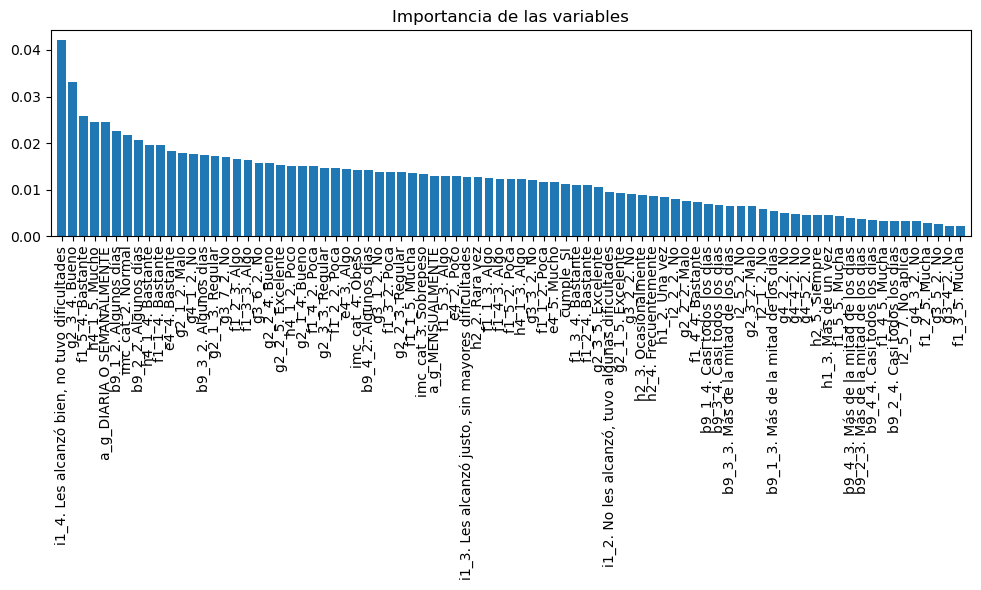

In [66]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Supongamos que tienes tus datos X e y ya preparados

# Crear el modelo RandomForestClassifier
rf = RandomForestClassifier(random_state=2023)
rf.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf.feature_importances_

# Obtener los nombres de las columnas como etiquetas
feature_names = X_train.columns

# Ordenar los índices de importancia en orden descendente
indices = np.argsort(importances)[::-1]

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.title("Importancia de las variables")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

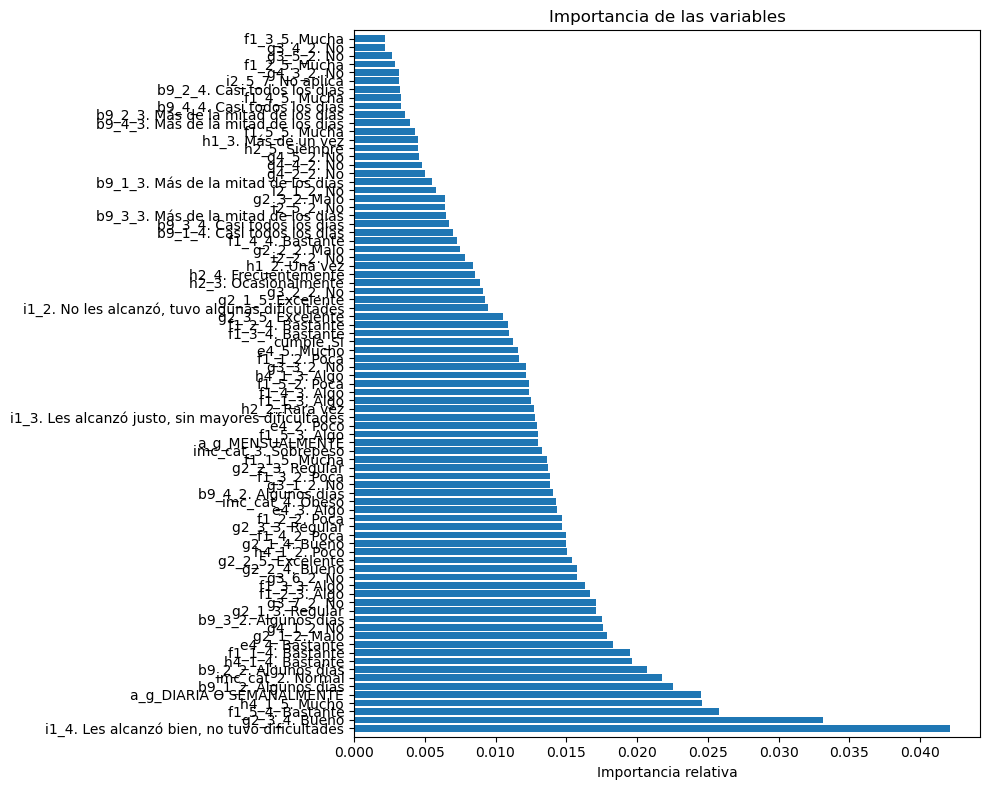

In [67]:

# Visualizar la importancia de las variables (gráfico de barras horizontal)
plt.figure(figsize=(10, 8))
plt.title("Importancia de las variables")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.ylim([-1, X_train.shape[1]])
plt.xlabel('Importancia relativa')
plt.tight_layout()
plt.show()

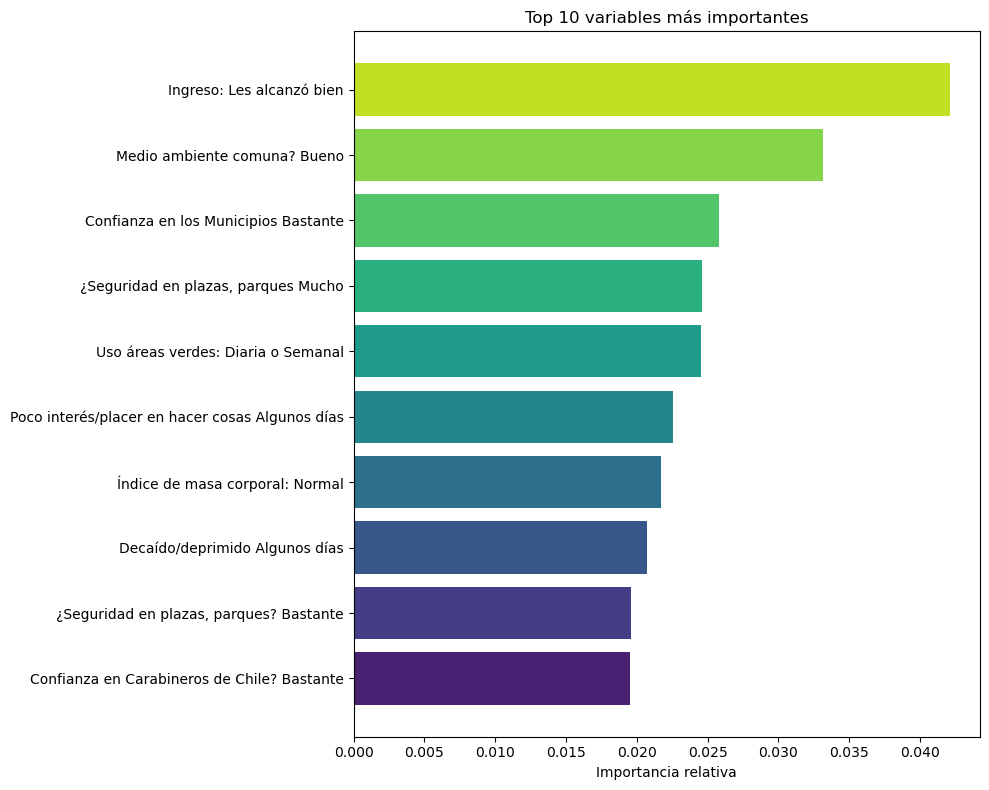

In [68]:

# Definir el número de variables a mostrar
num_features = 10  # Cambia este valor al número deseado de variables a mostrar

# Seleccionar una paleta de colores de Seaborn
colors = sns.color_palette("viridis", n_colors=num_features)

# Visualizar las "n" variables más importantes (gráfico de barras horizontal con paleta de colores)
plt.figure(figsize=(10, 8))
plt.title(f"Top {num_features} variables más importantes")
bars = plt.barh(range(num_features), importances[indices][:num_features][::-1], color=colors)
plt.yticks(range(num_features), [etiquetas_variables[feature] for feature in feature_names[indices][:num_features]][::-1])
plt.xlabel('Importancia relativa')

# Agregar una leyenda de colores

plt.tight_layout()
plt.show()

In [69]:
feature_names

Index(['i1_2. No les alcanzó, tuvo algunas dificultades',
       'i1_3. Les alcanzó justo, sin mayores dificultades',
       'i1_4. Les alcanzó bien, no tuvo dificultades', 'i2_1_2. No',
       'i2_2_2. No', 'i2_5_2. No', 'i2_5_7. No aplica', 'e4_2. Poco',
       'e4_3. Algo', 'e4_4. Bastante', 'e4_5. Mucho', 'f1_1_2. Poca',
       'f1_1_3. Algo', 'f1_1_4. Bastante', 'f1_1_5. Mucha', 'f1_2_2. Poca',
       'f1_2_3. Algo', 'f1_2_4. Bastante', 'f1_2_5. Mucha', 'f1_3_2. Poca',
       'f1_3_3. Algo', 'f1_3_4. Bastante', 'f1_3_5. Mucha', 'f1_4_2. Poca',
       'f1_4_3. Algo', 'f1_4_4. Bastante', 'f1_4_5. Mucha', 'f1_5_2. Poca',
       'f1_5_3. Algo', 'f1_5_4. Bastante', 'f1_5_5. Mucha',
       'b9_1_2. Algunos días', 'b9_1_3. Más de la mitad de los días​',
       'b9_1_4. Casi todos los días', 'b9_2_2. Algunos días',
       'b9_2_3. Más de la mitad de los días​', 'b9_2_4. Casi todos los días',
       'b9_3_2. Algunos días', 'b9_3_3. Más de la mitad de los días​',
       'b9_3_4. Casi todos 

In [70]:
importances

array([0.00943459, 0.01278663, 0.04212168, 0.00581793, 0.00786752,
       0.00644191, 0.00319205, 0.01289732, 0.01433303, 0.01832472,
       0.01161612, 0.0116416 , 0.01251172, 0.01952159, 0.01360584,
       0.01466726, 0.01666609, 0.01088898, 0.00286553, 0.01381453,
       0.01633312, 0.01095944, 0.00218253, 0.01497841, 0.01235942,
       0.00729835, 0.00332004, 0.01233448, 0.01297613, 0.02581136,
       0.00433071, 0.02257219, 0.00548666, 0.00697866, 0.02070069,
       0.00357799, 0.00326957, 0.01750156, 0.00650067, 0.00674571,
       0.01409601, 0.0039609 , 0.00334733, 0.02173232, 0.01329327,
       0.01426756, 0.01790129, 0.01712123, 0.01500877, 0.00927444,
       0.00751401, 0.01372739, 0.01572826, 0.0153683 , 0.00641663,
       0.01467889, 0.03313127, 0.01055345, 0.01382649, 0.00909692,
       0.01213381, 0.00221511, 0.00268391, 0.01573393, 0.01709445,
       0.01759007, 0.00501446, 0.00317487, 0.00477155, 0.00456466,
       0.00843761, 0.00448948, 0.01269123, 0.0088686 , 0.00857

In [71]:
# Crear DataFrame con las etiquetas_variables
df_etiquetas = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_etiquetas['Labels'] = df_etiquetas['Feature'].map(etiquetas_variables)

# Ordenar por importancia en orden descendente
df_etiquetas = df_etiquetas.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Mostrar DataFrame con estilo de barra para la importancia de las variables y sus etiquetas
df_etiquetas.style.bar(subset=['Importance'], color='#5fba7d')

,Feature,Importance,Labels
0,"i1_4. Les alcanzó bien, no tuvo dificultades",0.042122,Ingreso: Les alcanzó bien
1,g2_3_4. Bueno,0.033131,Medio ambiente comuna? Bueno
2,f1_5_4. Bastante,0.025811,Confianza en los Municipios Bastante
3,h4_1_5. Mucho,0.024578,"¿Seguridad en plazas, parques Mucho"
4,a_g_DIARIA O SEMANALMENTE,0.024536,Uso áreas verdes: Diaria o Semanal
5,b9_1_2. Algunos días,0.022572,Poco interés/placer en hacer cosas Algunos días
6,imc_cat_2. Normal,0.021732,Índice de masa corporal: Normal
7,b9_2_2. Algunos días,0.020701,Decaído/deprimido Algunos días
8,h4_1_4. Bastante,0.019614,"¿Seguridad en plazas, parques? Bastante"
9,f1_1_4. Bastante,0.019522,Confianza en Carabineros de Chile? Bastante


In [72]:
df_etiquetas = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_etiquetas['Labels'] = df_etiquetas['Feature'].map(etiquetas_variables)

# Ordenar por importancia en orden descendente
df_etiquetas = df_etiquetas.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Eliminar la columna 'Feature' del DataFrame final
df_etiquetas = df_etiquetas[['Labels', 'Importance']]


# Mostrar solo las 50 variables más importantes
top_50_importance = df_etiquetas.head(50)

# Mostrar DataFrame con estilo de barra para la importancia de las variables y sus etiquetas
top_50_importance.style.bar(subset=['Importance'], color='#5fba7d')


,Labels,Importance
0,Ingreso: Les alcanzó bien,0.042122
1,Medio ambiente comuna? Bueno,0.033131
2,Confianza en los Municipios Bastante,0.025811
3,"¿Seguridad en plazas, parques Mucho",0.024578
4,Uso áreas verdes: Diaria o Semanal,0.024536
5,Poco interés/placer en hacer cosas Algunos días,0.022572
6,Índice de masa corporal: Normal,0.021732
7,Decaído/deprimido Algunos días,0.020701
8,"¿Seguridad en plazas, parques? Bastante",0.019614
9,Confianza en Carabineros de Chile? Bastante,0.019522


In [78]:

colors=['#d65f5f', '#5fba7d']
color_map = cm.get_cmap('viridis')  # Puedes elegir otra paleta de colores aquí

# Crear el DataFrame con estilo de barra para la importancia de las variables y sus etiquetas
styled_df = top_50_importance.style.bar(subset=['Importance'], cmap: 'viridis', vmin=0.005, vmax=0.05)

styled_df



SyntaxError: positional argument follows keyword argument (2081839937.py, line 5)

In [79]:

import matplotlib.cm as cm

# Seleccionar solo las 50 variables más importantes
top_50_importance = df_etiquetas.head(50)

# Definir una paleta de colores
color_map = cm.get_cmap('viridis')  # Puedes elegir otra paleta de colores aquí

# Normalizar los valores de importancia para asignar colores
normalized_values = (top_50_importance['Importance'] - top_50_importance['Importance'].min()) / (top_50_importance['Importance'].max() - top_50_importance['Importance'].min())

# Crear una lista de colores basados en la paleta y los valores normalizados
colors = [color_map(value) for value in normalized_values]

# Crear el DataFrame con estilo de barra para la importancia de las variables y sus etiquetas
styled_df = top_50_importance.style.bar(subset=['Importance'], color=colors, vmin=0, vmax=1)

styled_df


C:\Users\tamar\AppData\Local\Temp\ipykernel_8184\3127930870.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis')  # Puedes elegir otra paleta de colores aquí


ValueError: `color` must be string or list or tuple of 2 strings,(eg: color=['#d65f5f', '#5fba7d'])

In [80]:


# Crear un DataFrame con la importancia de las variables
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Mostrar todas las variables y sus importancias
print(df_importance)


                                         Feature  Importance
0   i1_4. Les alcanzó bien, no tuvo dificultades    0.042122
1                                  g2_3_4. Bueno    0.033131
2                               f1_5_4. Bastante    0.025811
3                                  h4_1_5. Mucho    0.024578
4                      a_g_DIARIA O SEMANALMENTE    0.024536
..                                           ...         ...
78                                    g4_3_2. No    0.003175
79                                 f1_2_5. Mucha    0.002866
80                                    g3_5_2. No    0.002684
81                                    g3_4_2. No    0.002215
82                                 f1_3_5. Mucha    0.002183

[83 rows x 2 columns]


Accuracy en testeo: 0.8298969072164949


ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

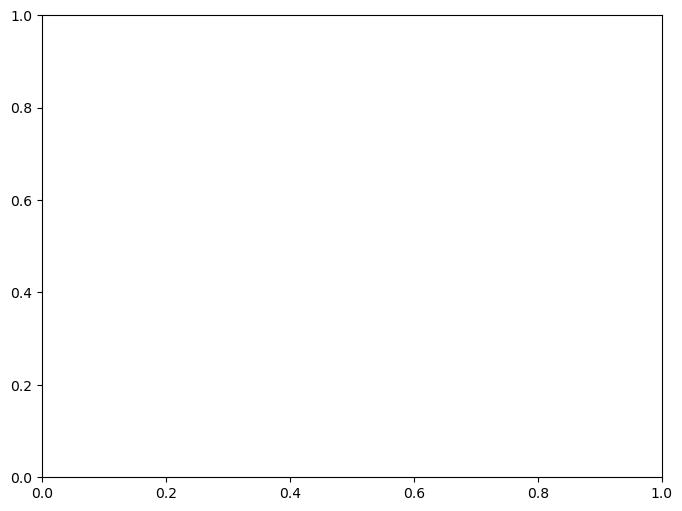

In [81]:
#from sklearn.ensemble import RandomForestClassifier # RandomForestRegression
from mlxtend.plotting import plot_decision_regions

rf = RandomForestClassifier(random_state=2023)
rf.fit(X_train, y_train)
print("Accuracy en testeo:", rf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_train, y_train, rf, ax=ax, n_jobs=-1)
ax.set_title("Regiones de decisión de Random Forest")
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2");

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [82]:
from sklearn.model_selection import GridSearchCV, KFold

hiperparametros = {
    "n_estimators": np.arange(10, 151, 15),
    "ccp_alpha"   : np.logspace(-6, 0.5, 10)
}
configuraciones = KFold(n_splits=25, shuffle=True, random_state=2023)
modelo          = RandomForestClassifier(max_depth=30, criterion="gini", random_state=2023)

modelos = GridSearchCV(
    estimator  = modelo,
    param_grid = hiperparametros,
    cv         = configuraciones,
    scoring    = "accuracy",
    n_jobs     = -1,
    verbose    = 1
)
modelos.fit(X_train, y_train)

Fitting 25 folds for each of 100 candidates, totalling 2500 fits


GridSearchCV(cv=KFold(n_splits=25, random_state=2023, shuffle=True),
             estimator=RandomForestClassifier(max_depth=30, random_state=2023),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([1.00000000e-06, 5.27499706e-06, 2.78255940e-05, 1.46779927e-04,
       7.74263683e-04, 4.08423865e-03, 2.15443469e-02, 1.13646367e-01,
       5.99484250e-01, 3.16227766e+00]),
                         'n_estimators': array([ 10,  25,  40,  55,  70,  85, 100, 115, 130, 145])},
             scoring='accuracy', verbose=1)

Mejores hiperparámetros: {'ccp_alpha': 0.000774263682681127, 'n_estimators': 115}
Accuracy en testeo: 0.8298969072164949


ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

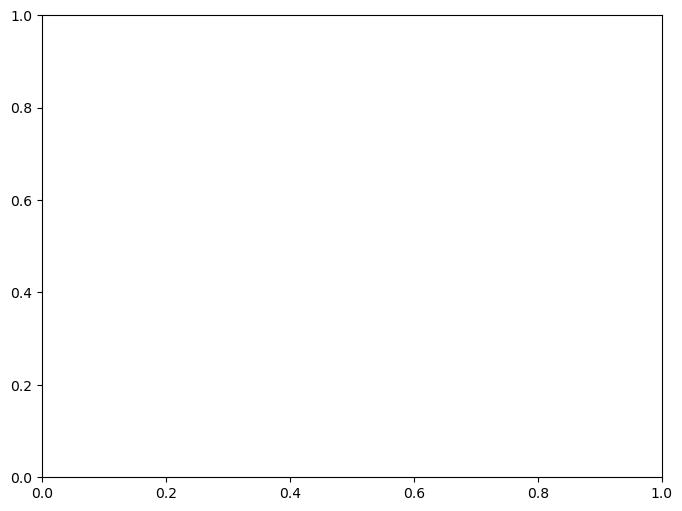

In [83]:
print("Mejores hiperparámetros:", modelos.best_params_)
best_rf = modelos.best_estimator_.fit(X_train, y_train)

print("Accuracy en testeo:", best_rf.score(X_test, y_test))
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_regions(X_train, y_train, best_rf, ax=ax)
ax.set_title("Regiones de decisión de Random Forest optimizado")
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2");

In [84]:
# Después de haber ajustado el modelo con GridSearchCV
mejor_modelo = modelos.best_estimator_

# Obtener la importancia de las características
importancia_caracteristicas = mejor_modelo.feature_importances_

# Mostrar la importancia de las características
print(importancia_caracteristicas)

[0.00976018 0.01307258 0.0444337  0.00564159 0.00823723 0.00636076
 0.00338089 0.01347986 0.01340977 0.01849923 0.01163542 0.01197293
 0.01319534 0.01951652 0.01277649 0.01468573 0.01640042 0.01109836
 0.00264574 0.01379291 0.01616308 0.01150045 0.00216888 0.01513881
 0.01199246 0.00725983 0.00356967 0.01183729 0.01284419 0.02572723
 0.00416965 0.02356511 0.00494469 0.00688128 0.02075276 0.00370186
 0.00334064 0.01748442 0.00734215 0.00670453 0.01449129 0.00378846
 0.00339917 0.02170514 0.01293025 0.01361181 0.01833281 0.01664427
 0.01446826 0.00897255 0.00752407 0.0130546  0.015197   0.01548007
 0.0064067  0.01434951 0.03439877 0.01029198 0.01400994 0.00956852
 0.01220436 0.00211723 0.00267169 0.0156589  0.01648867 0.01620311
 0.00519596 0.00300898 0.00497434 0.00461825 0.00831702 0.00447729
 0.01277445 0.00867337 0.00922335 0.00453789 0.0146914  0.01208332
 0.01949507 0.02422806 0.02465356 0.01286796 0.01112598]


In [85]:
mejor_modelo.feature_importances_

array([0.00976018, 0.01307258, 0.0444337 , 0.00564159, 0.00823723,
       0.00636076, 0.00338089, 0.01347986, 0.01340977, 0.01849923,
       0.01163542, 0.01197293, 0.01319534, 0.01951652, 0.01277649,
       0.01468573, 0.01640042, 0.01109836, 0.00264574, 0.01379291,
       0.01616308, 0.01150045, 0.00216888, 0.01513881, 0.01199246,
       0.00725983, 0.00356967, 0.01183729, 0.01284419, 0.02572723,
       0.00416965, 0.02356511, 0.00494469, 0.00688128, 0.02075276,
       0.00370186, 0.00334064, 0.01748442, 0.00734215, 0.00670453,
       0.01449129, 0.00378846, 0.00339917, 0.02170514, 0.01293025,
       0.01361181, 0.01833281, 0.01664427, 0.01446826, 0.00897255,
       0.00752407, 0.0130546 , 0.015197  , 0.01548007, 0.0064067 ,
       0.01434951, 0.03439877, 0.01029198, 0.01400994, 0.00956852,
       0.01220436, 0.00211723, 0.00267169, 0.0156589 , 0.01648867,
       0.01620311, 0.00519596, 0.00300898, 0.00497434, 0.00461825,
       0.00831702, 0.00447729, 0.01277445, 0.00867337, 0.00922

In [86]:
pd.DataFrame(
    data    = zip(["Var1", "Var2"], mejor_modelo.feature_importances_),
    columns = ["Variable", "Importancia Relativa"]
)\
    .sort_values("Importancia Relativa", ascending=False)\
    .style.bar()

,Variable,Importancia Relativa
1,Var2,0.013073
0,Var1,0.009760
